In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [22]:
scripts = pd.read_csv('data/processed_scripts.csv')
meta = pd.read_csv('data/metadata.csv')

In [25]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
#Create two new columns Subjectivity & Polarity
scripts = scripts[pd.notnull(scripts['Dialog'])] # Get rid of nulls
scripts['subjectivity'] = scripts['Dialog'].apply(getSubjectivity)
scripts['polarity'] = scripts['Dialog'].apply(getPolarity)
scripts.sort_values('S-E', inplace=True, ignore_index=True)

scripts

,Season,Episode,Title,Speaker,Dialog,S-E,subjectivity,polarity
0,1,1,Monica Gets A Roommate,Paul,ooh steer clear of you,01-01,0.383333,0.1
1,1,1,Monica Gets A Roommate,Ross,this was carols favorite beer she always drank...,01-01,1.000000,0.5
2,1,1,Monica Gets A Roommate,Joey,hey-hey-hey-hey if youre gonna start with that...,01-01,0.000000,0.0
3,1,1,Monica Gets A Roommate,Chandler,yes please dont spoil all this fun,01-01,0.200000,0.3
4,1,1,Monica Gets A Roommate,Joey,ross let me ask you a question she got the fur...,01-01,0.600000,0.7
...,...,...,...,...,...,...,...,...
55543,10,17,The Last One,Joey,oh theyre in the table,10-17,0.000000,0.0
55544,10,17,The Last One,Joey,wait wait do you hear that,10-17,0.000000,0.0
55545,10,17,The Last One,Joey,alright,10-17,0.000000,0.0
55546,10,17,The Last One,Joey,just put it on a plate and leave,10-17,0.000000,0.0


In [4]:
scripts.describe()

,Season,Episode,subjectivity,polarity
count,55548.000000,55548.000000,55548.000000,55548.000000
mean,5.537661,12.381724,0.283540,0.079900
std,2.801439,6.880128,0.331831,0.263884
min,1.000000,1.000000,0.000000,-1.000000
25%,3.000000,6.000000,0.000000,0.000000
50%,6.000000,12.000000,0.000000,0.000000
75%,8.000000,18.000000,0.535714,0.200000
max,10.000000,25.000000,1.000000,1.000000


From this, we can see that on average, the show tends to be neutral (neither positive nor negative) on the whole.

In [5]:
data = {}
for episode in scripts['S-E'].unique():
    subjectivity = scripts[scripts['S-E'] == episode].subjectivity.mean()
    polarity = scripts[scripts['S-E'] == episode].polarity.mean()
    data[episode] = [subjectivity, polarity]

data = {k: v for k, v in sorted(data.items(), key=lambda item: item[0])}

In [6]:
ep = list(data.keys())
sub = [i[0] for i in data.values()]
pol = [i[1] for i in data.values()] 

Maximum Subjectivity:  0.3975670735730896
Minimum Subjectivity:  0.2058145722454933


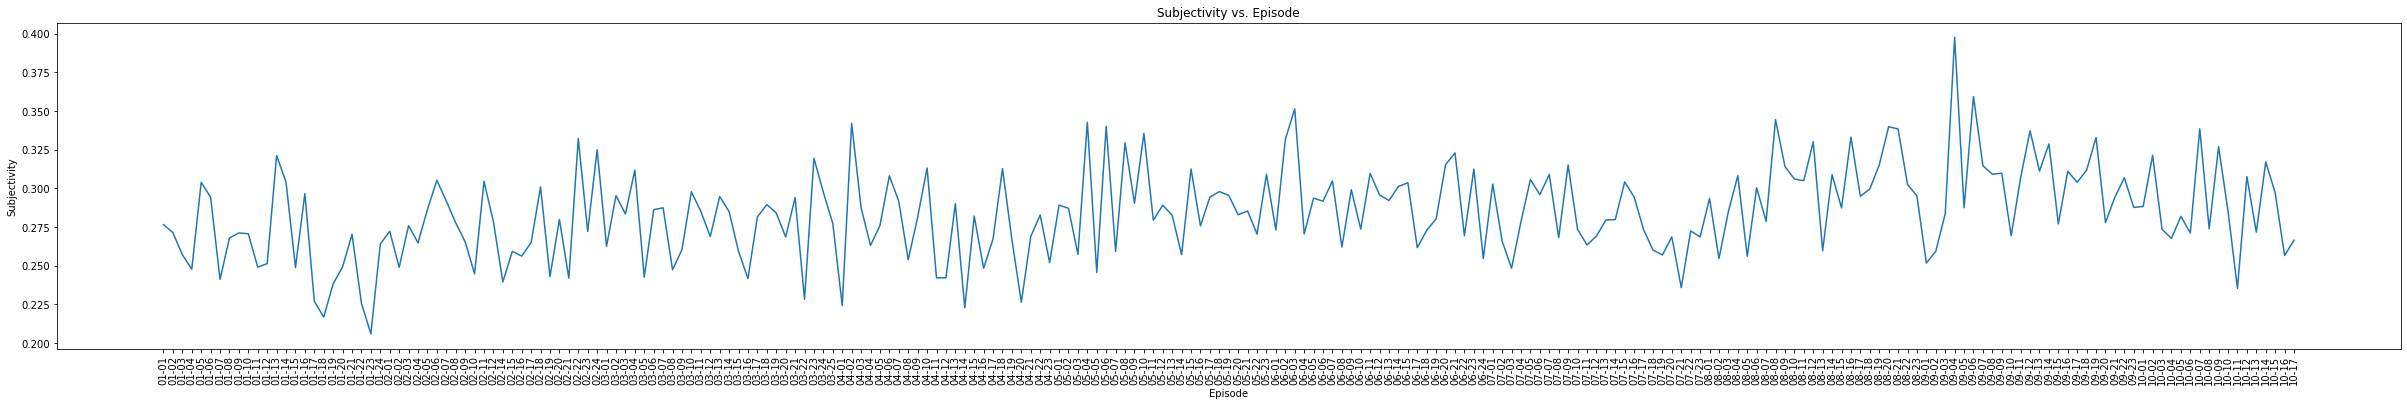

In [7]:
print("Maximum Subjectivity: ", max(sub))
print("Minimum Subjectivity: ", min(sub))

plt.figure(figsize=(42, 6))
plt.plot(ep, sub)
plt.xticks(rotation=90)
plt.xlabel("Episode")
plt.ylabel("Subjectivity")
plt.title("Subjectivity vs. Episode")
plt.show()

Maximum Polarity:  0.1298456909629424
Minimum Polarity:  0.01869768872001015


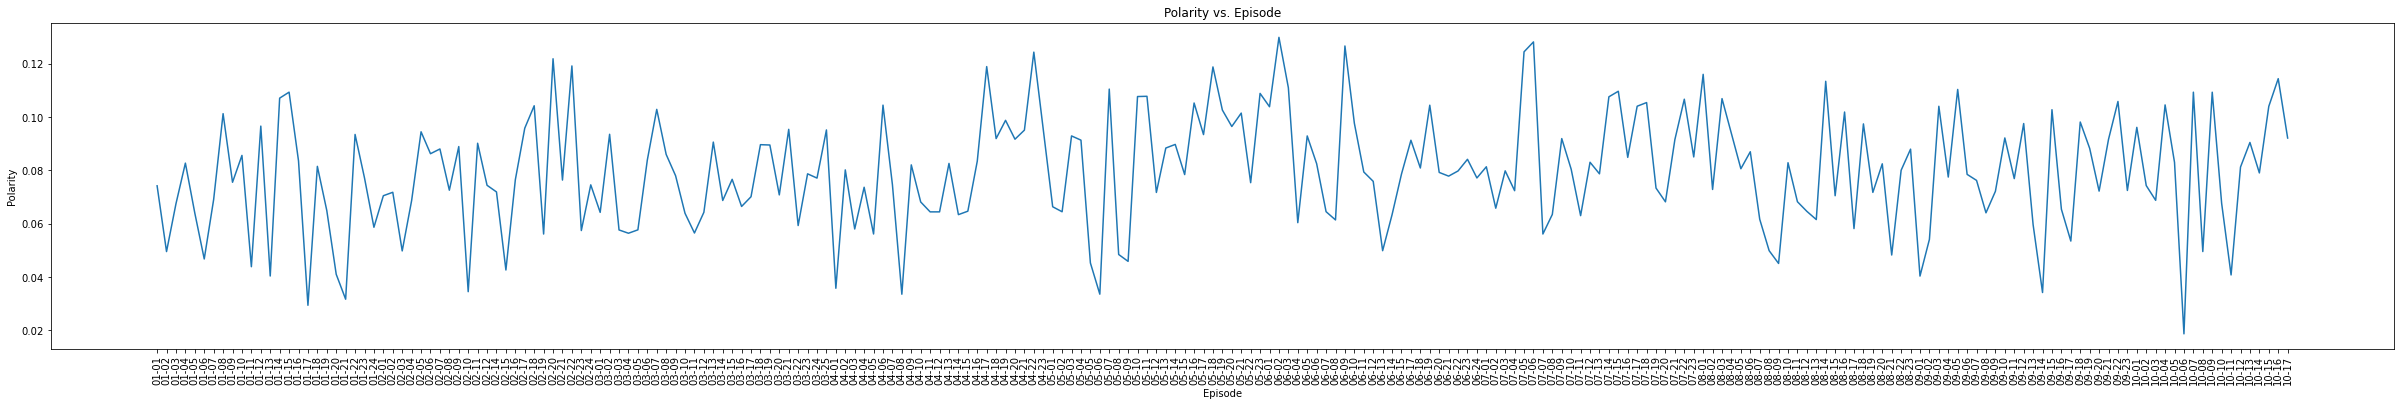

In [8]:
print("Maximum Polarity: ", max(pol))
print("Minimum Polarity: ", min(pol))

plt.figure(figsize=(42, 6))
plt.plot(ep, pol)
plt.xticks(rotation=90)
plt.xlabel("Episode")
plt.ylabel("Polarity")
plt.title("Polarity vs. Episode")
plt.show()

In [23]:
meta['mean_pol'] = pol
meta['mean_sub'] = sub

In [26]:
stdpol = []
stdsub = []

for ep in meta['S-E'].unique():
    df_pol = scripts[scripts['S-E'] == ep].polarity
    df_sub = scripts[scripts['S-E'] == ep].subjectivity
    stdpol.append(df_pol.std())
    stdsub.append(df_sub.std())

In [27]:
meta['std_pol'] = stdpol
meta['std_sub'] = stdsub

In [28]:
meta

,S-E,Viewers,Stars,mean_pol,mean_sub,std_pol,std_sub
0,01-01,21.50,8.300000,0.074195,0.276415,0.252467,0.335934
1,01-02,20.20,8.100000,0.049539,0.271280,0.243068,0.334856
2,01-03,19.50,8.200000,0.067452,0.257053,0.260840,0.324931
3,01-04,19.70,8.100000,0.082691,0.247592,0.228299,0.309634
4,01-05,18.60,8.500000,0.063965,0.303793,0.278254,0.350825
...,...,...,...,...,...,...,...
222,10-13,24.27,8.500000,0.090443,0.271573,0.256424,0.318880
223,10-14,22.83,8.600000,0.079022,0.316948,0.303195,0.357962
224,10-15,22.64,8.500000,0.103972,0.297047,0.279416,0.329810
225,10-16,24.51,8.900000,0.114352,0.256486,0.242318,0.309385


In [44]:
data = meta.drop(['S-E', 'std_pol', 'std_sub', 'Viewers'], axis=1)
datadata = meta.drop(['S-E', 'std_pol', 'std_sub', 'Viewers'], axis=1)

,Stars,mean_pol,mean_sub
0,8.300000,0.074195,0.276415
1,8.100000,0.049539,0.271280
2,8.200000,0.067452,0.257053
3,8.100000,0.082691,0.247592
4,8.500000,0.063965,0.303793
...,...,...,...
222,8.500000,0.090443,0.271573
223,8.600000,0.079022,0.316948
224,8.500000,0.103972,0.297047
225,8.900000,0.114352,0.256486


## Is there a correlation between episode's "feels" and rating?

In [30]:
from sklearn import linear_model

### Overall Episode Values vs rating

In [45]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Stars,mean_pol,mean_sub
Stars,1.000000,-0.000450,-0.144868
mean_pol,-0.000450,1.000000,0.178863
mean_sub,-0.144868,0.178863,1.000000


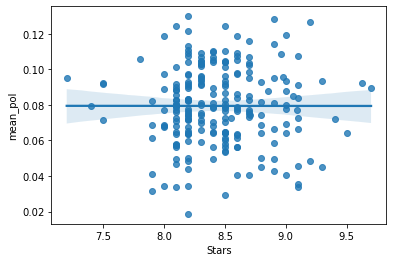

In [32]:
sns.regplot(x=data['Stars'], y=data['mean_pol'])
plt.show()

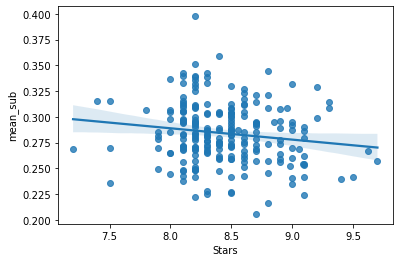

In [33]:
sns.regplot(x=data['Stars'], y=data['mean_sub'])
plt.show()

Overall, we can see that there is a slightly negative correlation between average subjectivity of an episode and the rating.

In [34]:
reg = linear_model.LinearRegression()

X = data[["mean_sub", "mean_pol"]].to_numpy()
Y = data["Stars"].to_numpy()

reg.fit(X, Y)
print(f"Coefficients of regression are a:{reg.coef_[0]: .2f}, b:{reg.coef_[1]: .2f}")
print(f"Correlation of regression model is :{np.corrcoef(x=X.dot(reg.coef_), y=Y)[0][1]: .4f}")

Coefficients of regression are a:-1.97, b: 0.47
Correlation of regression model is : 0.1472


### Character-Wise Correlations

In [46]:
meanpol = {}
meansub = {}

characters = ['Rachel', 'Ross', 'Joey', 'Chandler', 'Monica', 'Phoebe']

# Initialize dictionary
for char in characters:
    meanpol[char] = []
    meansub[char] = []

# Get values
for ep in meta['S-E'].unique():
    # Get all dialogue of episode
    ep_df = scripts[scripts['S-E'] == ep]
    for char in characters:
        # Get all lines of speaker in episode
        char_df = ep_df[ep_df.Speaker == char]
        # Append corresponding values
        meanpol[char].append(char_df.polarity.mean())
        meansub[char].append(char_df.subjectivity.mean())

# Add to dataframe
for char in meanpol.keys():
    data[f"{char}_pol"] = meanpol[char]

for char in meansub.keys():
    data[f"{char}_sub"] = meansub[char]

data

,Stars,mean_pol,mean_sub,Rachel_pol,Ross_pol,Joey_pol,Chandler_pol,Monica_pol,Phoebe_pol,Rachel_sub,Ross_sub,Joey_sub,Chandler_sub,Monica_sub,Phoebe_sub
0,8.300000,0.074195,0.276415,0.078639,0.070788,0.075790,0.111639,0.063650,0.042721,0.294483,0.363107,0.198195,0.315778,0.269515,0.254292
1,8.100000,0.049539,0.271280,0.029977,0.093482,0.008234,-0.050586,-0.002115,0.192581,0.317492,0.221446,0.341915,0.340820,0.350489,0.330676
2,8.200000,0.067452,0.257053,0.031092,0.043666,0.018358,0.112257,0.055620,0.088191,0.251969,0.259692,0.131845,0.343420,0.309601,0.262226
3,8.100000,0.082691,0.247592,0.155877,0.097680,-0.007861,0.082488,0.087858,0.034987,0.286212,0.255025,0.248173,0.327296,0.240222,0.144829
4,8.500000,0.063965,0.303793,0.051959,0.110429,0.134373,0.027243,-0.038823,0.119865,0.279904,0.250900,0.282509,0.374124,0.356896,0.343370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,8.500000,0.090443,0.271573,0.121183,0.072689,0.103798,0.095823,0.062877,0.074525,0.317690,0.333364,0.149549,0.339987,0.200360,0.171272
223,8.600000,0.079022,0.316948,0.081576,0.171451,0.085822,0.009013,0.040391,0.069549,0.237354,0.375086,0.405256,0.152887,0.407707,0.313259
224,8.500000,0.103972,0.297047,0.140654,0.166504,0.030213,0.063129,0.080823,0.129114,0.286325,0.255760,0.323279,0.302153,0.369383,0.292928
225,8.900000,0.114352,0.256486,0.147091,0.094791,0.109602,0.052757,0.110504,0.170476,0.212814,0.250878,0.278400,0.203680,0.283566,0.292143


In [47]:
data = data.drop(['mean_pol', 'mean_sub'], axis=1)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Stars,Rachel_pol,Ross_pol,Joey_pol,Chandler_pol,Monica_pol,Phoebe_pol,Rachel_sub,Ross_sub,Joey_sub,Chandler_sub,Monica_sub,Phoebe_sub
Stars,1.000000,0.027912,-0.012459,-0.022813,0.086913,0.008985,-0.040362,-0.087439,-0.064039,-0.100051,-0.014791,0.038762,-0.021838
Rachel_pol,0.027912,1.000000,0.010313,0.132842,0.067512,0.171291,0.001471,0.209046,0.050747,-0.021754,-0.081500,0.081979,-0.084470
Ross_pol,-0.012459,0.010313,1.000000,-0.027788,-0.041471,0.046919,-0.014682,-0.249076,0.252030,0.018745,-0.025565,0.170570,-0.035836
Joey_pol,-0.022813,0.132842,-0.027788,1.000000,0.054999,-0.010643,-0.008355,0.136939,0.101971,0.245901,0.073264,0.093331,0.101227
Chandler_pol,0.086913,0.067512,-0.041471,0.054999,1.000000,0.171488,0.047770,-0.014924,-0.075577,-0.077379,0.181237,0.022298,0.002422
Monica_pol,0.008985,0.171291,0.046919,-0.010643,0.171488,1.000000,0.078304,-0.006324,0.007732,0.053524,-0.089673,0.094510,0.046709
Phoebe_pol,-0.040362,0.001471,-0.014682,-0.008355,0.047770,0.078304,1.000000,-0.049289,-0.119400,0.012589,-0.088460,0.053570,0.357066
Rachel_sub,-0.087439,0.209046,-0.249076,0.136939,-0.014924,-0.006324,-0.049289,1.000000,-0.010507,0.122952,0.091033,-0.001263,0.072913
Ross_sub,-0.064039,0.050747,0.252030,0.101971,-0.075577,0.007732,-0.119400,-0.010507,1.000000,0.151442,-0.016270,0.094983,0.085504
Joey_sub,-0.100051,-0.021754,0.018745,0.245901,-0.077379,0.053524,0.012589,0.122952,0.151442,1.000000,0.004443,0.243212,0.177684


In [49]:
reg = linear_model.LinearRegression()

X = data.drop(['Stars'], axis=1).to_numpy()
Y = data["Stars"].to_numpy()

reg.fit(X, Y)
print(f"Correlation of regression model is :{np.corrcoef(x=X.dot(reg.coef_), y=Y)[0][1]: .4f}")
print("Model coefficients:")
print("-------------------")
for i in range(X.shape[1]):
    print(data.drop(['Stars'], axis=1).columns[i], "=", reg.coef_[i].round(5))

Correlation of regression model is : 0.1851
Model coefficients:
-------------------
Rachel_pol = 0.30553
Ross_pol = -0.22983
Joey_pol = 0.0063
Chandler_pol = 0.60023
Monica_pol = -0.07344
Phoebe_pol = -0.45386
Rachel_sub = -0.58046
Ross_sub = -0.32255
Joey_sub = -0.51604
Chandler_sub = -0.1504
Monica_sub = 0.40267
Phoebe_sub = 0.1065


From this, we can infer that there is an overall weak positive correlation between the "feels" of an episode and its rating.

## Is there a correlation between episode's dramaticity and next episode's viewership?

In [69]:
data = meta.drop(['S-E', 'mean_pol', 'mean_sub', 'Stars'], axis=1)
data

,Viewers,std_pol,std_sub
0,21.50,0.252467,0.335934
1,20.20,0.243068,0.334856
2,19.50,0.260840,0.324931
3,19.70,0.228299,0.309634
4,18.60,0.278254,0.350825
...,...,...,...
222,24.27,0.256424,0.318880
223,22.83,0.303195,0.357962
224,22.64,0.279416,0.329810
225,24.51,0.242318,0.309385


In [70]:
reg = linear_model.LinearRegression()

X = data[["std_sub", "std_pol"]].to_numpy()[:-1]
Y = data["Viewers"].to_numpy()[1:]

reg.fit(X, Y)
print(f"Coefficients of regression are a:{reg.coef_[0]: .2f}, b:{reg.coef_[1]: .2f}")
print(f"Correlation of regression model is :{np.corrcoef(x=X.dot(reg.coef_), y=Y)[0][1]: .4f}")

Coefficients of regression are a:-64.50, b: 24.01
Correlation of regression model is : 0.1848


In [71]:
temp = pd.DataFrame(X, columns=['std_sub', 'std_pol'])
temp['Viewers'] = Y
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm')

,std_sub,std_pol,Viewers
std_sub,1.000000,0.499679,-0.156945
std_pol,0.499679,1.000000,0.006085
Viewers,-0.156945,0.006085,1.000000


### Character-wise Correlation

In [72]:
stdpol = {}
stdsub = {}

characters = ['Rachel', 'Ross', 'Joey', 'Chandler', 'Monica', 'Phoebe']

# Initialize dictionary
for char in characters:
    stdpol[char] = []
    stdsub[char] = []

# Get values
for ep in meta['S-E'].unique():
    # Get all dialogue of episode
    ep_df = scripts[scripts['S-E'] == ep]
    for char in characters:
        # Get all lines of speaker in episode
        char_df = ep_df[ep_df.Speaker == char]
        # Append corresponding values
        stdpol[char].append(char_df.polarity.std())
        stdsub[char].append(char_df.subjectivity.std())

for char in stdpol.keys():
    data[f"{char}_pol"] = stdpol[char]

for char in stdsub.keys():
    data[f"{char}_sub"] = stdsub[char]
    
data

,Viewers,std_pol,std_sub,Rachel_pol,Ross_pol,Joey_pol,Chandler_pol,Monica_pol,Phoebe_pol,Rachel_sub,Ross_sub,Joey_sub,Chandler_sub,Monica_sub,Phoebe_sub
0,21.50,0.252467,0.335934,0.246663,0.258342,0.256381,0.266237,0.241012,0.307784,0.349604,0.375526,0.279786,0.360250,0.327925,0.319801
1,20.20,0.243068,0.334856,0.290637,0.215764,0.219700,0.334536,0.185685,0.345138,0.361988,0.295847,0.271527,0.370567,0.402190,0.351158
2,19.50,0.260840,0.324931,0.290739,0.204207,0.184014,0.254771,0.286437,0.282732,0.314753,0.351380,0.269373,0.302229,0.351970,0.316507
3,19.70,0.228299,0.309634,0.225679,0.236118,0.207369,0.312147,0.216655,0.122337,0.299867,0.294651,0.334178,0.359486,0.332267,0.218452
4,18.60,0.278254,0.350825,0.270563,0.212175,0.282307,0.369259,0.264842,0.288369,0.327817,0.286886,0.342439,0.372999,0.426075,0.367590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,24.27,0.256424,0.318880,0.276465,0.316490,0.189363,0.321772,0.205137,0.181966,0.310510,0.336285,0.241370,0.357943,0.322854,0.280835
223,22.83,0.303195,0.357962,0.287826,0.366973,0.335640,0.228518,0.286085,0.305483,0.313756,0.375825,0.388603,0.267527,0.395498,0.339051
224,22.64,0.279416,0.329810,0.266970,0.226778,0.326914,0.297507,0.342541,0.267224,0.362127,0.301972,0.351311,0.357343,0.320161,0.321365
225,24.51,0.242318,0.309385,0.231964,0.262220,0.239541,0.169932,0.280310,0.242618,0.263492,0.323383,0.323612,0.297431,0.331689,0.313604


In [75]:
reg = linear_model.LinearRegression()

X = data.drop(['Viewers'], axis=1).to_numpy()[:-1]
Y = data["Viewers"].to_numpy()[1:]

reg.fit(X, Y)
print(f"Correlation of regression model is :{np.corrcoef(x=X.dot(reg.coef_), y=Y)[0][1]: .4f}")
print("Model coefficients:")
print("-------------------")
for i in range(X.shape[1]):
    print(data.drop(['Viewers'], axis=1).columns[i], "=", reg.coef_[i].round(5))

Correlation of regression model is : 0.2651
Model coefficients:
-------------------
Rachel_pol = 15.13087
Ross_pol = 13.21164
Joey_pol = 0.71723
Chandler_pol = -12.61344
Monica_pol = 7.29537
Phoebe_pol = -5.29468
Rachel_sub = -9.80308
Ross_sub = -15.36744
Joey_sub = 1.9939
Chandler_sub = -7.54499
Monica_sub = -11.64279
Phoebe_sub = -1.92524


In [76]:
temp = pd.DataFrame(X, columns=data.columns[1:])
temp['Viewers'] = Y
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rachel_pol,Ross_pol,Joey_pol,Chandler_pol,Monica_pol,Phoebe_pol,Rachel_sub,Ross_sub,Joey_sub,Chandler_sub,Monica_sub,Phoebe_sub,Viewers
Rachel_pol,1.000000,0.119175,-0.005533,0.159022,-0.057639,0.176904,0.463514,0.054905,-0.004296,0.062656,0.006312,0.019548,0.076477
Ross_pol,0.119175,1.000000,0.140653,0.010794,0.074221,0.063390,-0.001467,0.561485,0.132067,0.025917,0.087567,0.028538,0.083433
Joey_pol,-0.005533,0.140653,1.000000,-0.005193,0.070945,0.052778,0.040509,0.041807,0.621738,0.050669,0.133175,0.161642,0.015753
Chandler_pol,0.159022,0.010794,-0.005193,1.000000,0.049461,0.029517,0.063684,0.028741,0.030685,0.578600,0.097974,-0.083070,-0.165086
Monica_pol,-0.057639,0.074221,0.070945,0.049461,1.000000,0.137042,0.013900,0.073434,0.041584,-0.015812,0.509087,0.049428,0.016361
Phoebe_pol,0.176904,0.063390,0.052778,0.029517,0.137042,1.000000,0.125397,-0.045082,-0.069788,-0.056226,0.124451,0.322956,-0.031716
Rachel_sub,0.463514,-0.001467,0.040509,0.063684,0.013900,0.125397,1.000000,0.050168,0.079692,0.150850,0.005981,0.206430,-0.038260
Ross_sub,0.054905,0.561485,0.041807,0.028741,0.073434,-0.045082,0.050168,1.000000,0.131743,0.042628,0.011696,0.024679,-0.032004
Joey_sub,-0.004296,0.132067,0.621738,0.030685,0.041584,-0.069788,0.079692,0.131743,1.000000,0.062022,0.132707,0.106173,0.003663
Chandler_sub,0.062656,0.025917,0.050669,0.578600,-0.015812,-0.056226,0.150850,0.042628,0.062022,1.000000,0.023748,-0.027003,-0.142405


From this, we can infer that there is a weak positive correlation between the dramaticity of an episode, and the subsequent episode's viewership.